In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")


In [2]:
ds=pd.read_csv("Baseball.csv")
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
ds.shape

(30, 17)

The given dataset has 30 Rows and 17 Columns

In [4]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the values are numerical dataset so no encoding is required

In [5]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no missing ir null value 

In [6]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

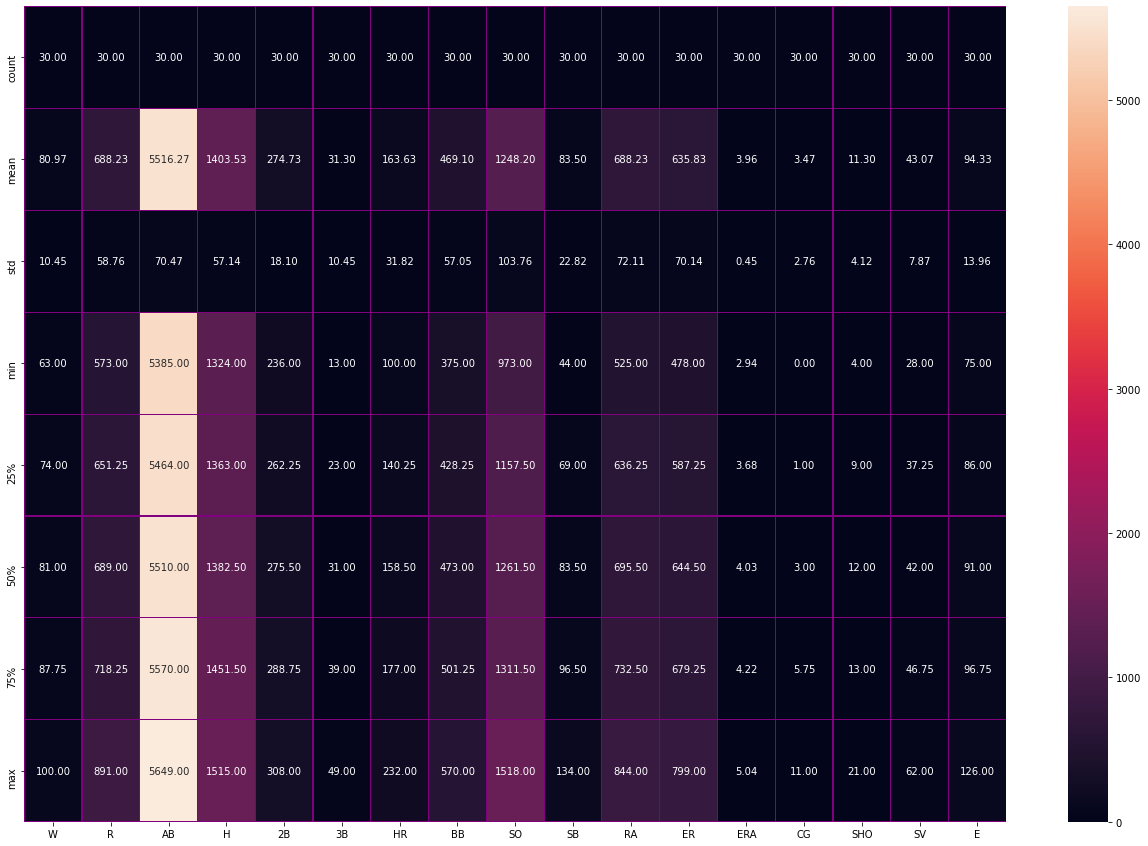

In [7]:
plt.figure(figsize=(22,15))
sb.heatmap(ds.describe(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

<AxesSubplot:>

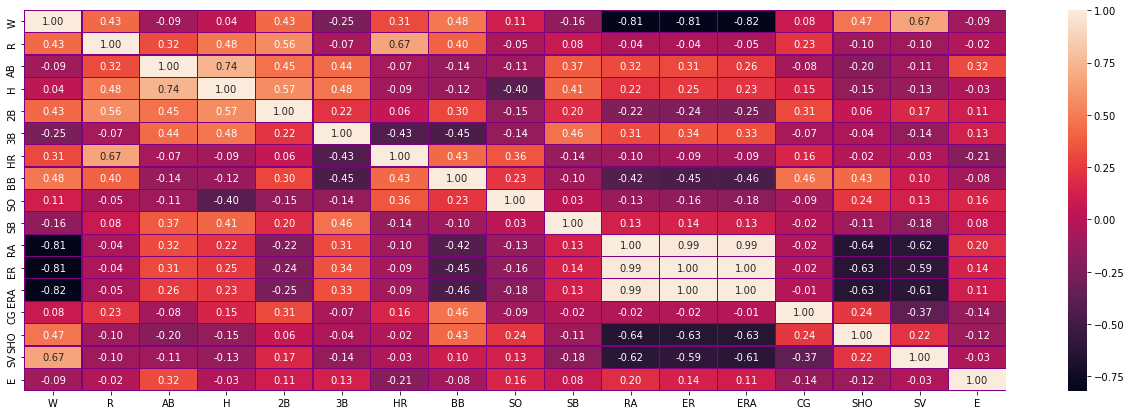

In [8]:
plt.figure(figsize=(22,7))
sb.heatmap(ds.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

In [9]:

for i in ds.columns:
        print(str(i))
        print(ds[i].value_counts())
        print("\n")

W
68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64


R
696    2
689    2
703    1
669    1
644    1
720    1
647    1
713    1
650    1
655    1
656    1
724    1
661    1
729    1
667    1
737    1
573    1
613    1
683    1
748    1
622    1
751    1
626    1
694    1
697    1
891    1
764    1
640    1
Name: R, dtype: int64


AB
5485    2
5631    1
5467    1
5572    1
5509    1
5575    1
5640    1
5385    1
5567    1
5511    1
5649    1
5459    1
5480    1
5463    1
5529    1
5533    1
5565    1
5439    1
5600    1
5527    1
5605    1
5544    1
5417    1
5484    1
5420    1
5491    1
5428    1
5457    1
5571    1
Name: AB, dtype: int64


H
1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1


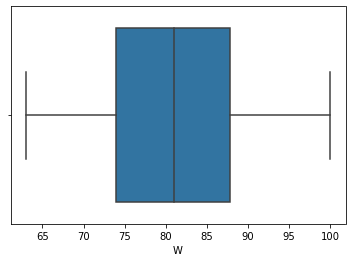

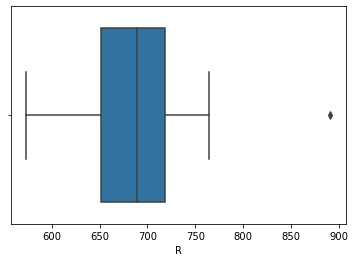

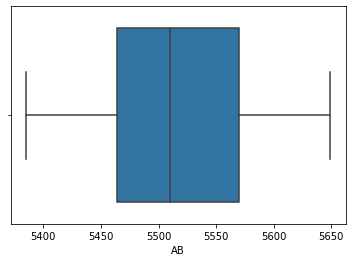

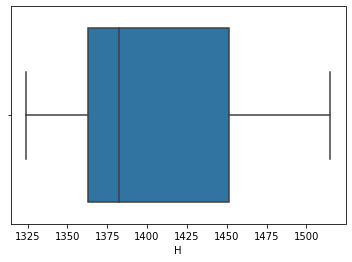

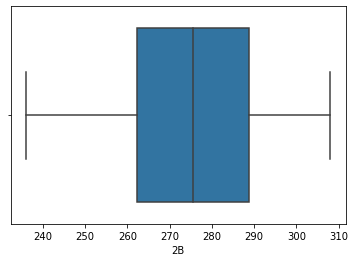

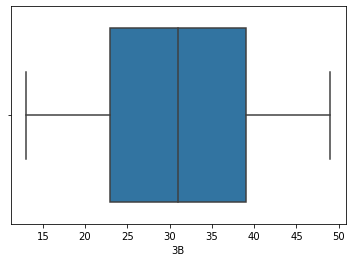

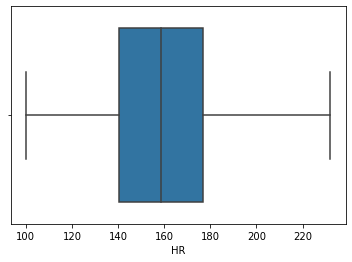

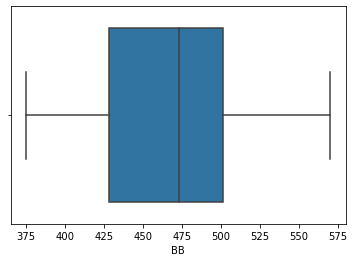

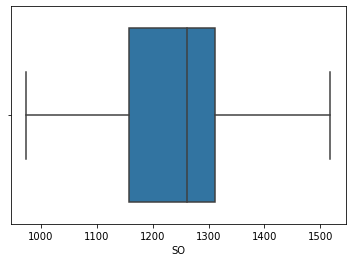

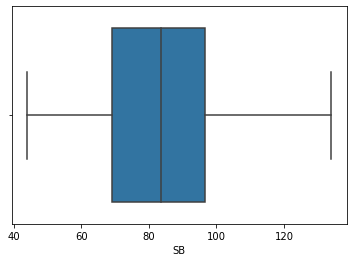

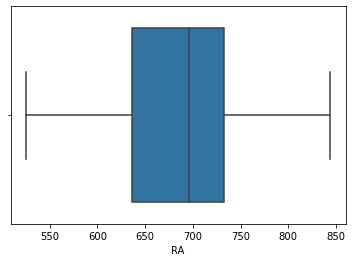

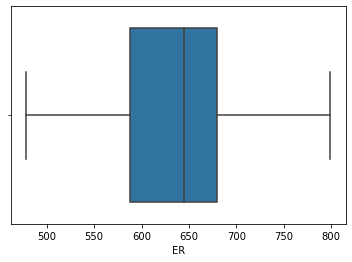

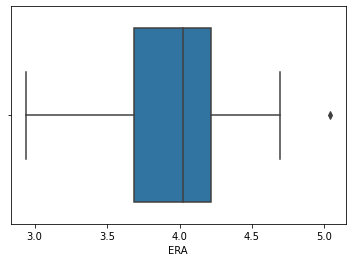

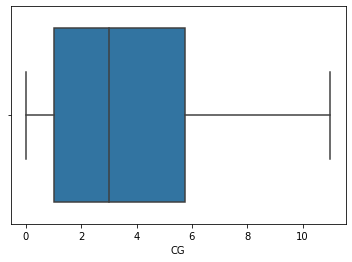

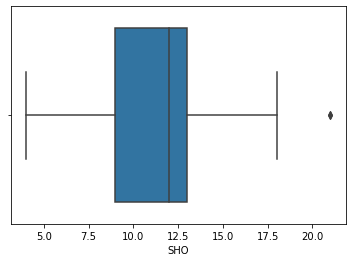

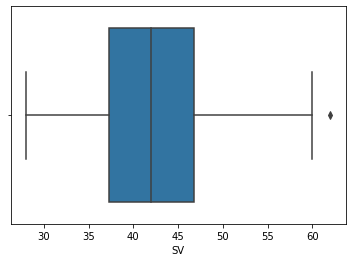

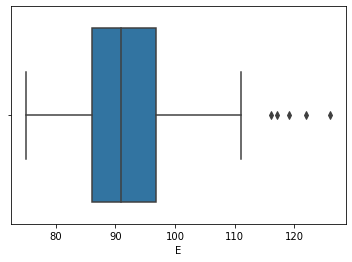

In [10]:

for  i in ds.columns:
    plt.figure()
    sb.boxplot(ds[i])

There are outliers in R, ERA, SHO, SV, E

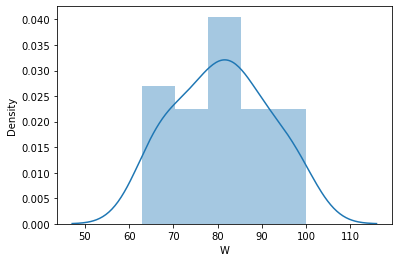

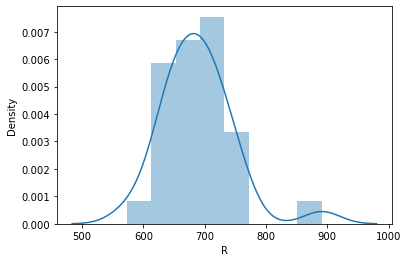

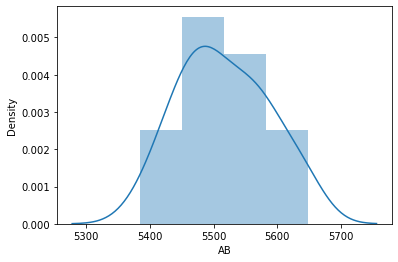

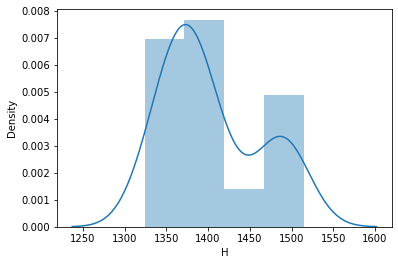

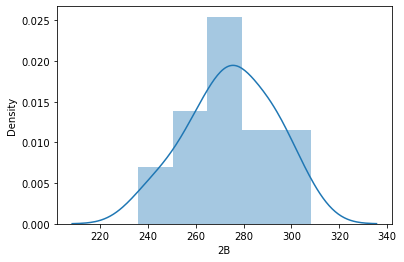

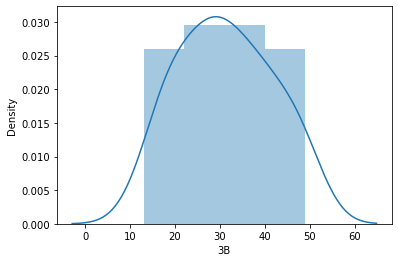

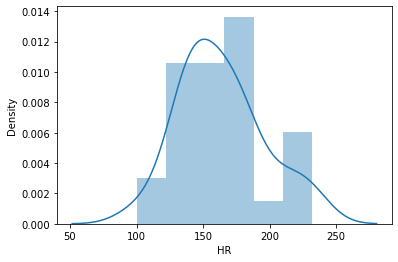

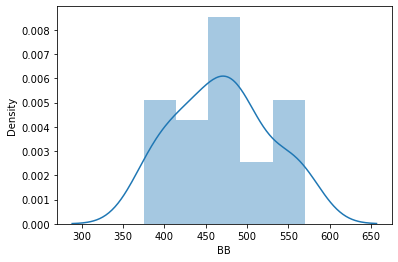

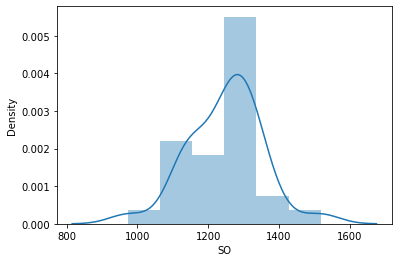

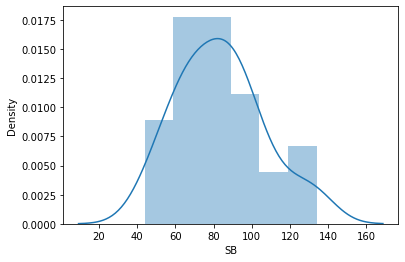

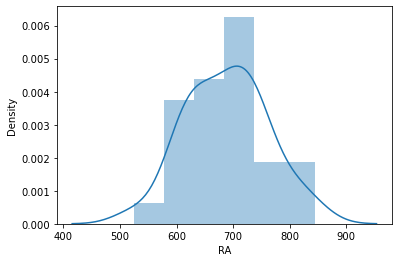

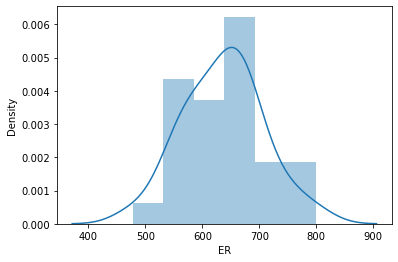

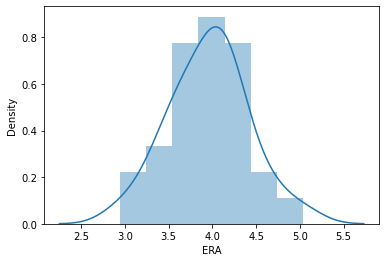

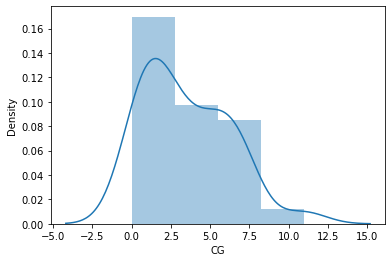

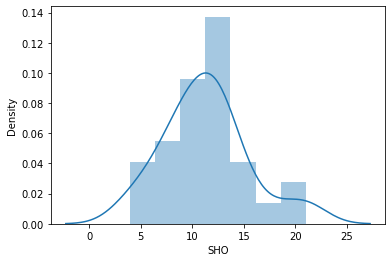

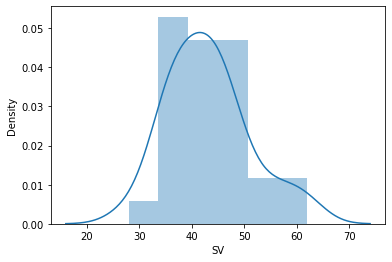

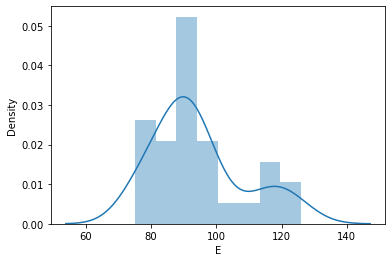

In [11]:
for  i in ds.columns:
    plt.figure()
    sb.distplot(ds[i])

In [12]:
ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

The R, H, HR, CG, SHO, SV, E are skewed nad need to be treated 

In [13]:
ds["R"]= np.cbrt(ds["R"])

In [14]:
ds["SV"]= np.sqrt(ds["SV"])
ds["H"]= np.sqrt(ds["H"])
ds["HR"]= np.sqrt(ds["HR"])
ds["CG"]= np.sqrt(ds["CG"])
ds["SHO"]= np.sqrt(ds["SHO"])



In [15]:
ds["E"]= np.cbrt(ds["E"])

In [16]:
ds.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.649567
2B    -0.230650
3B     0.129502
HR     0.264948
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.311476
SHO   -0.061761
SV     0.410288
E      0.719735
dtype: float64

<Figure size 432x288 with 0 Axes>

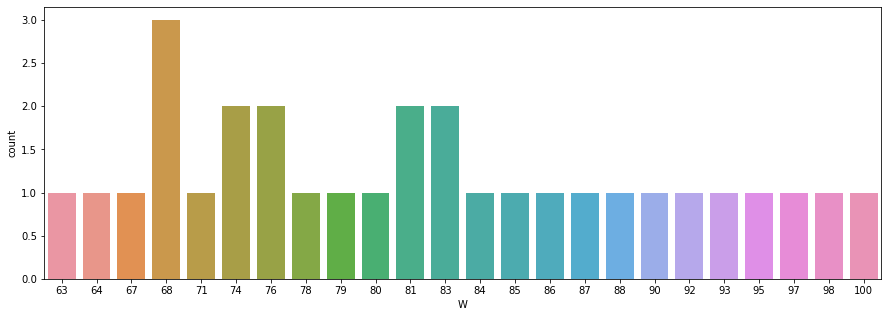

<Figure size 432x288 with 0 Axes>

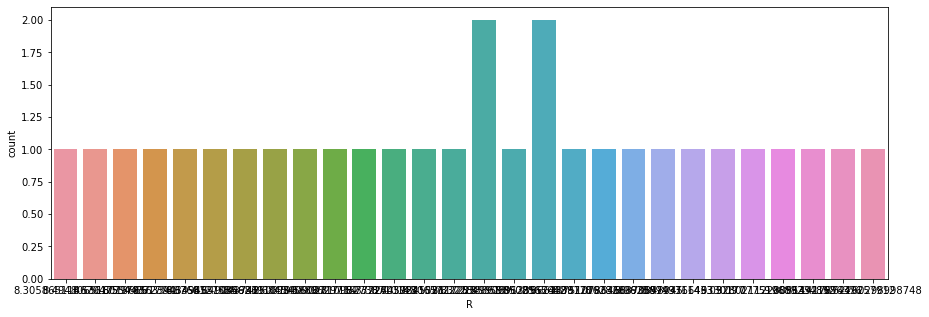

<Figure size 432x288 with 0 Axes>

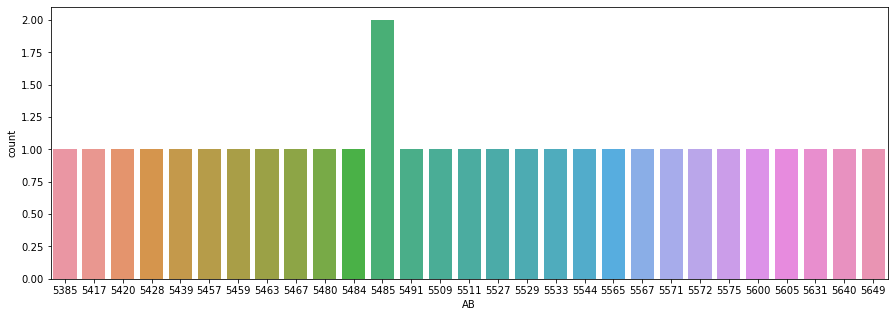

<Figure size 432x288 with 0 Axes>

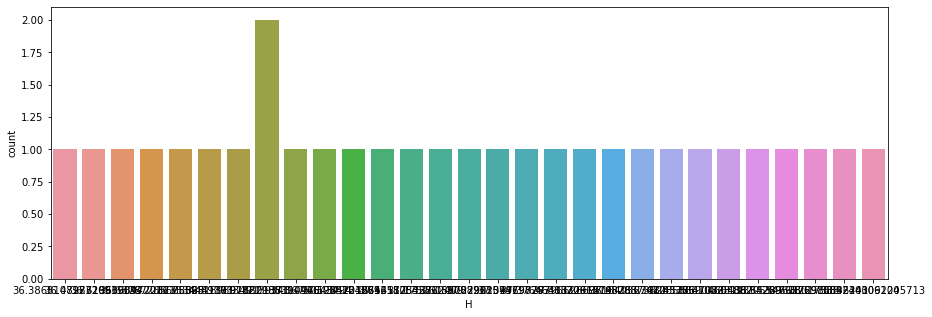

<Figure size 432x288 with 0 Axes>

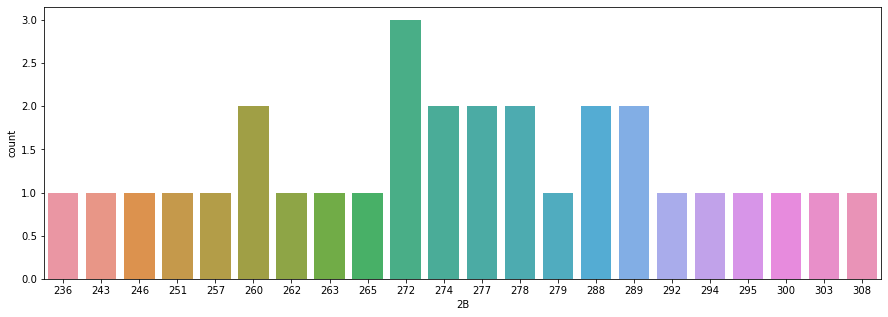

<Figure size 432x288 with 0 Axes>

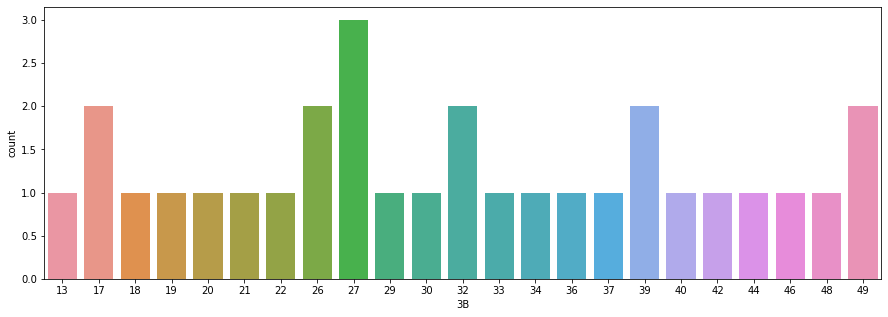

<Figure size 432x288 with 0 Axes>

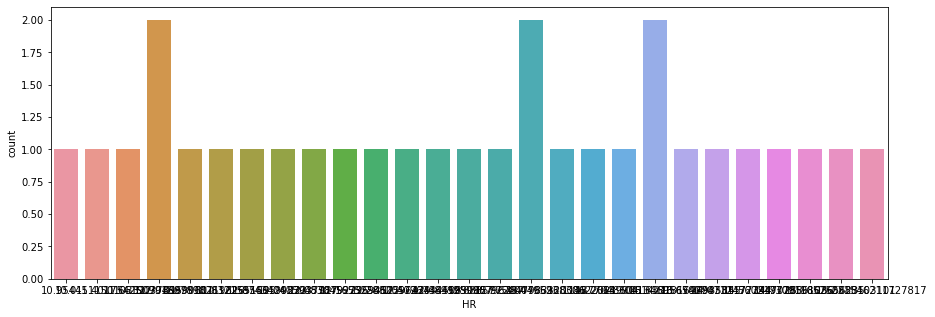

<Figure size 432x288 with 0 Axes>

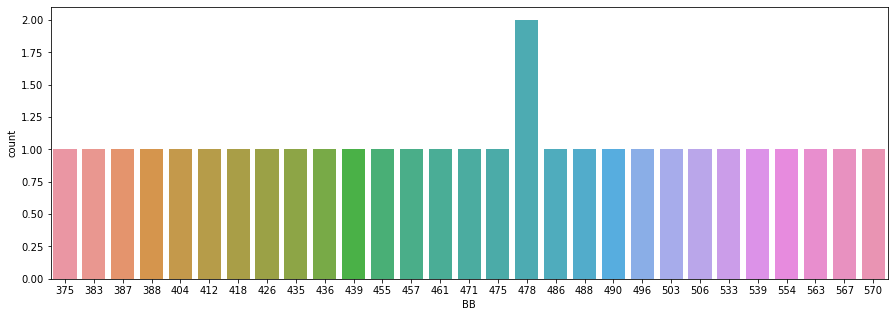

<Figure size 432x288 with 0 Axes>

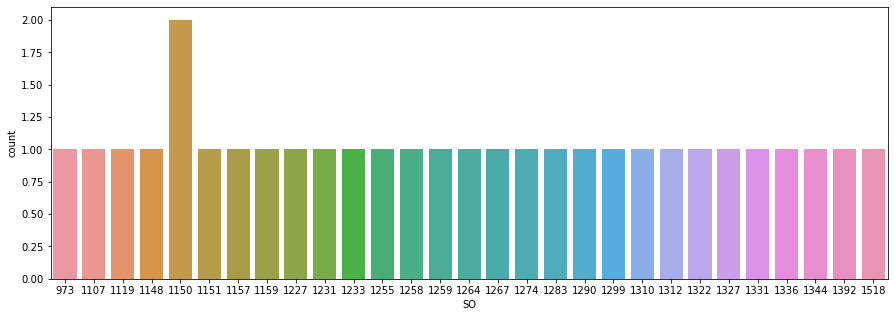

<Figure size 432x288 with 0 Axes>

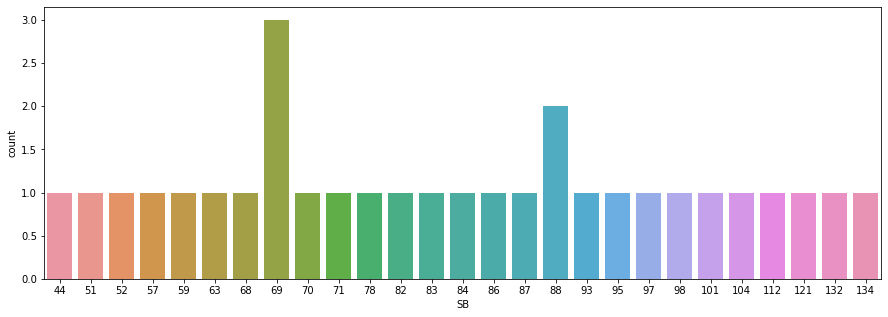

<Figure size 432x288 with 0 Axes>

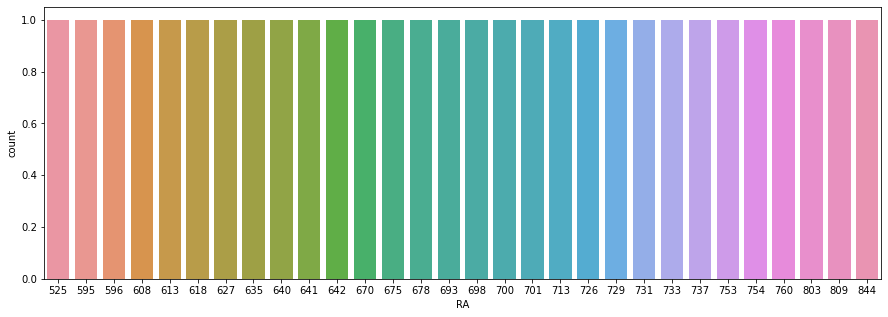

<Figure size 432x288 with 0 Axes>

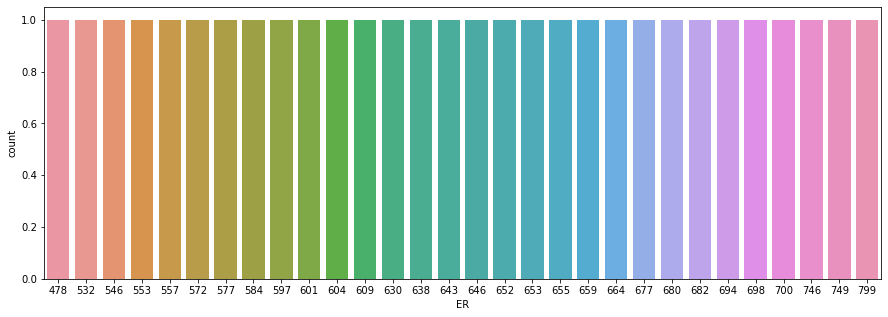

<Figure size 432x288 with 0 Axes>

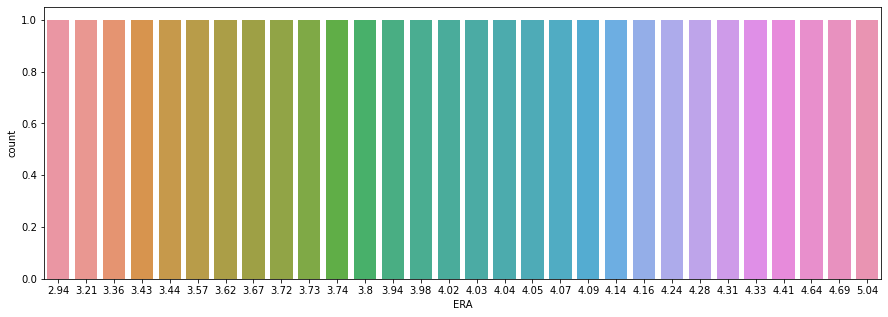

<Figure size 432x288 with 0 Axes>

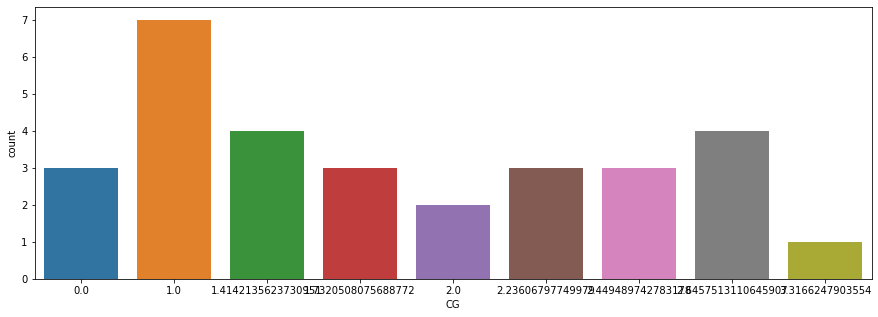

<Figure size 432x288 with 0 Axes>

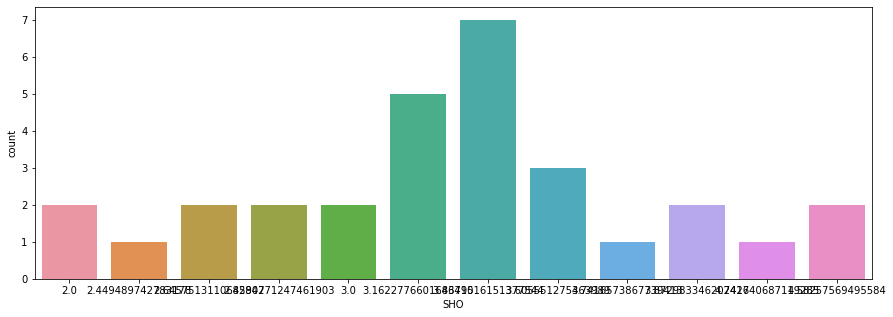

<Figure size 432x288 with 0 Axes>

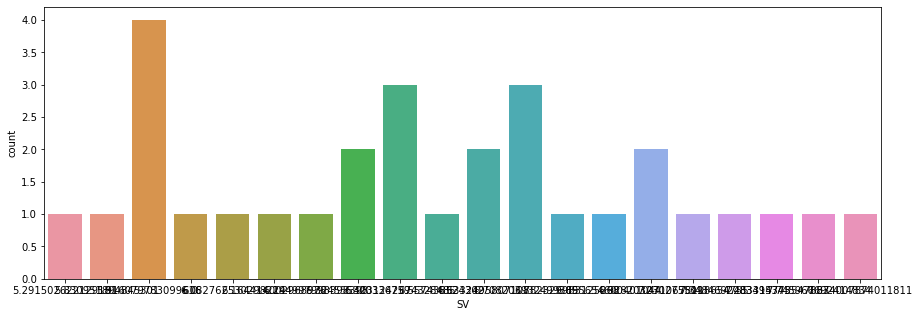

<Figure size 432x288 with 0 Axes>

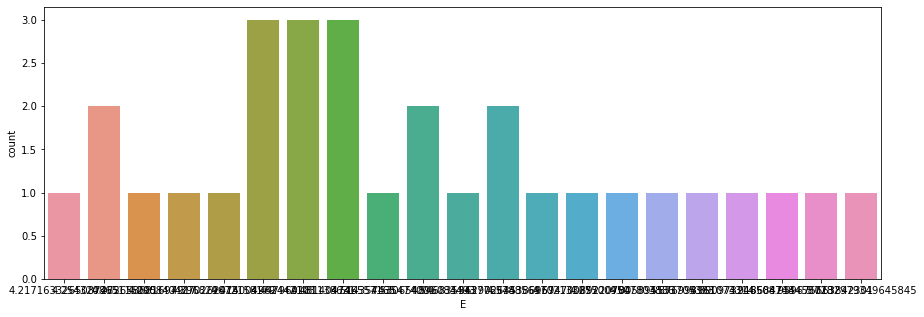

In [17]:


for  i in ds.columns:
    
    plt.figure()
    plt.figure(figsize=(15,5))
    sb.countplot(ds[i])
    

IN this above plot we can able to see the count of each value

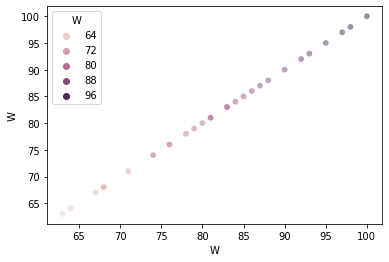

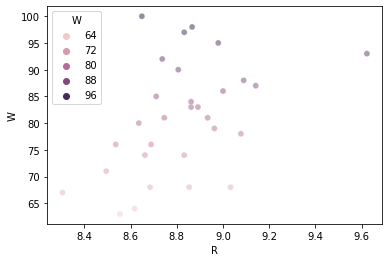

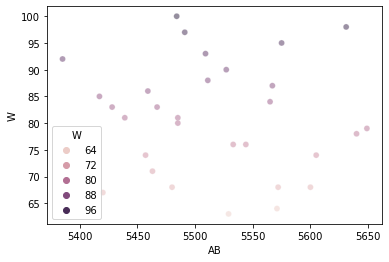

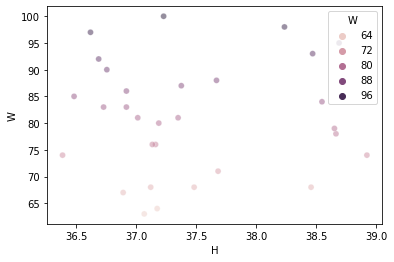

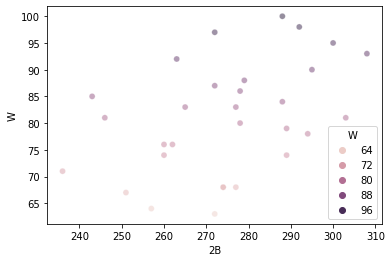

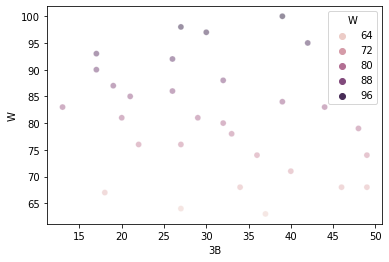

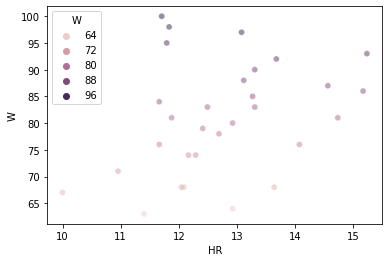

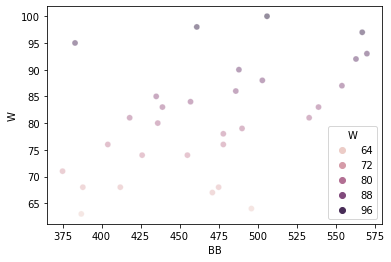

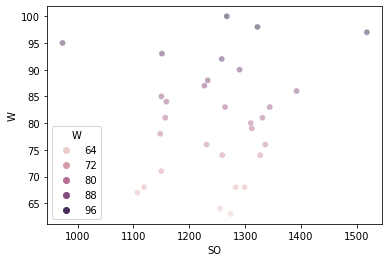

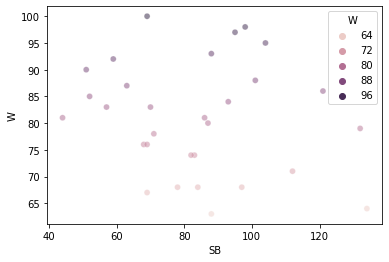

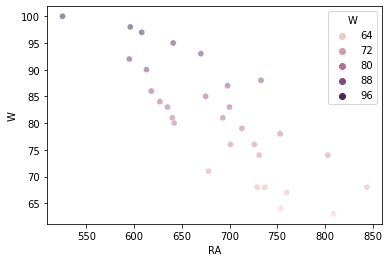

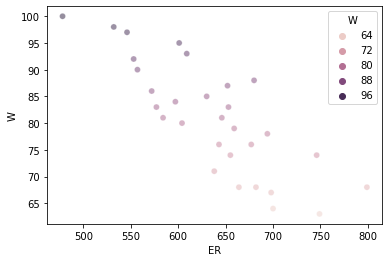

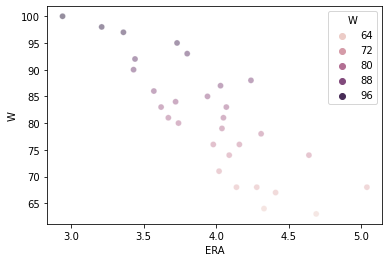

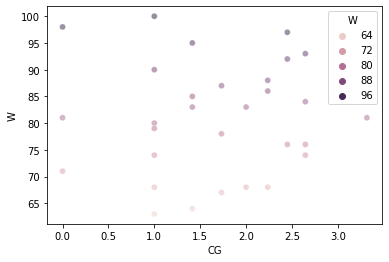

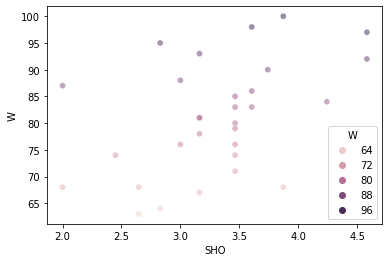

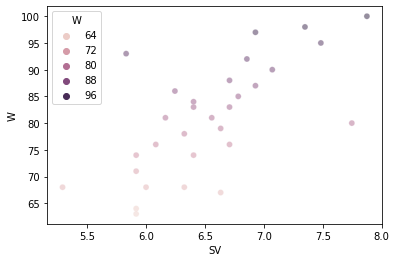

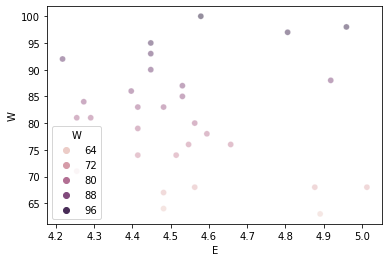

In [18]:
for  i in ds.columns:
    plt.figure()
    sb.scatterplot(ds[i],ds["W"],alpha=0.5,c=(0,1,1),hue=ds['W'])

All the data set  are much scattered with the target variable

In [19]:
#removing ourliers

from scipy.stats import zscore

z=np.abs(zscore(ds))
z

array([[1.36540860e+00, 6.50959255e-01, 8.47731264e-01, 1.65659155e+00,
        1.42017307e+00, 1.04119304e+00, 7.79588836e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 2.92055667e-01, 7.81873120e-01, 1.62988184e+00,
        4.39227807e-01],
       [1.97838300e-01, 1.64710226e-01, 7.11093535e-01, 9.76199843e-01,
        1.27403389e-01, 1.23580856e+00, 2.01722201e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 2.92055667e-01, 2.59566641e-01, 2.95192242e-01,
        5.97784739e-01],
       [3.24325082e-03, 3.16685030e-01, 1.11523330e+00, 1.43082336e-01,
        1.58879521e+00, 2.23807850e-01, 7.09835826e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 1.96563341e+00, 2.34918307e-01, 6.41178049e-01,
        1.17291256e+00],
       [4.83244373e-01, 1.18654368e+00, 2.41521620e-01, 3.951

In [20]:
threshold=3
np.where(z<3)


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 

In [21]:
ds.shape

(30, 17)

In [22]:
ds_new=ds[(z<3).all(axis=1)] #removing outliers

In [23]:
ds_new.shape

(29, 17)

In [24]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,8.822368,5516.266667,37.456345,274.733333,31.300000,12.734412,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,1.660310,3.305667,6.536773,4.542022
std,10.453455,0.245319,70.467372,0.758091,18.095405,10.452355,1.232360,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,0.857042,0.620815,0.590670,0.217813
min,63.000000,8.305865,5385.000000,36.386811,236.000000,13.000000,10.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,2.000000,5.291503,4.217163
25%,74.000000,8.667930,5464.000000,36.918830,262.250000,23.000000,11.842705,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,3.000000,6.103175,4.414005
50%,81.000000,8.832285,5510.000000,37.181984,275.500000,31.000000,12.589287,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,1.732051,3.464102,6.480281,4.497881
75%,87.750000,8.955524,5570.000000,38.097803,288.750000,39.000000,13.304135,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,2.396134,3.605551,6.837323,4.590740
max,100.000000,9.622603,5649.000000,38.923001,308.000000,49.000000,15.231546,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,3.316625,4.582576,7.874008,5.013298


In [25]:
ds_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,8.979377,5575,38.691084,300,42,11.789826,383,973,104,641,601,3.73,1.414214,2.828427,7.483315,4.447960
1,83,8.862095,5467,36.728735,277,44,12.489996,439,1264,70,700,653,4.07,1.414214,3.464102,6.708204,4.414005
2,81,8.745985,5439,37.349699,303,29,11.874342,533,1157,86,640,584,3.67,3.316625,3.162278,6.164414,4.290840
3,76,8.536178,5533,37.161808,260,27,11.661904,404,1231,68,701,643,3.98,2.645751,3.000000,6.082763,4.657010
4,74,8.832285,5605,38.923001,289,49,12.288206,455,1259,83,803,746,4.64,2.645751,3.464102,5.916080,4.414005
6,87,9.141787,5567,37.376463,272,19,14.560220,554,1227,63,698,652,4.03,1.732051,2.000000,6.928203,4.530655
7,81,8.933669,5485,37.013511,246,20,14.730920,418,1331,44,693,646,4.05,0.000000,3.162278,6.557439,4.254321
8,80,8.635655,5485,37.188708,278,32,12.922848,436,1310,87,642,604,3.74,1.000000,3.464102,7.745967,4.562903
9,78,9.077520,5640,38.665230,294,33,12.688578,478,1148,71,753,694,4.31,1.732051,3.162278,6.324555,4.594701
10,88,9.089639,5511,37.669616,279,32,13.114877,503,1233,101,733,680,4.24,2.236068,3.000000,6.708204,4.918685


In [26]:
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,8.979377,5575,38.691084,300,42,11.789826,383,973,104,641,601,3.73,1.414214,2.828427,7.483315,4.447960
1,83,8.862095,5467,36.728735,277,44,12.489996,439,1264,70,700,653,4.07,1.414214,3.464102,6.708204,4.414005
2,81,8.745985,5439,37.349699,303,29,11.874342,533,1157,86,640,584,3.67,3.316625,3.162278,6.164414,4.290840
3,76,8.536178,5533,37.161808,260,27,11.661904,404,1231,68,701,643,3.98,2.645751,3.000000,6.082763,4.657010
4,74,8.832285,5605,38.923001,289,49,12.288206,455,1259,83,803,746,4.64,2.645751,3.464102,5.916080,4.414005
5,93,9.622603,5509,38.470768,308,17,15.231546,570,1151,88,670,609,3.80,2.645751,3.162278,5.830952,4.447960
6,87,9.141787,5567,37.376463,272,19,14.560220,554,1227,63,698,652,4.03,1.732051,2.000000,6.928203,4.530655
7,81,8.933669,5485,37.013511,246,20,14.730920,418,1331,44,693,646,4.05,0.000000,3.162278,6.557439,4.254321
8,80,8.635655,5485,37.188708,278,32,12.922848,436,1310,87,642,604,3.74,1.000000,3.464102,7.745967,4.562903
9,78,9.077520,5640,38.665230,294,33,12.688578,478,1148,71,753,694,4.31,1.732051,3.162278,6.324555,4.594701


In [27]:
ds_new.shape

(29, 17)

In [28]:
ds.shape

(30, 17)

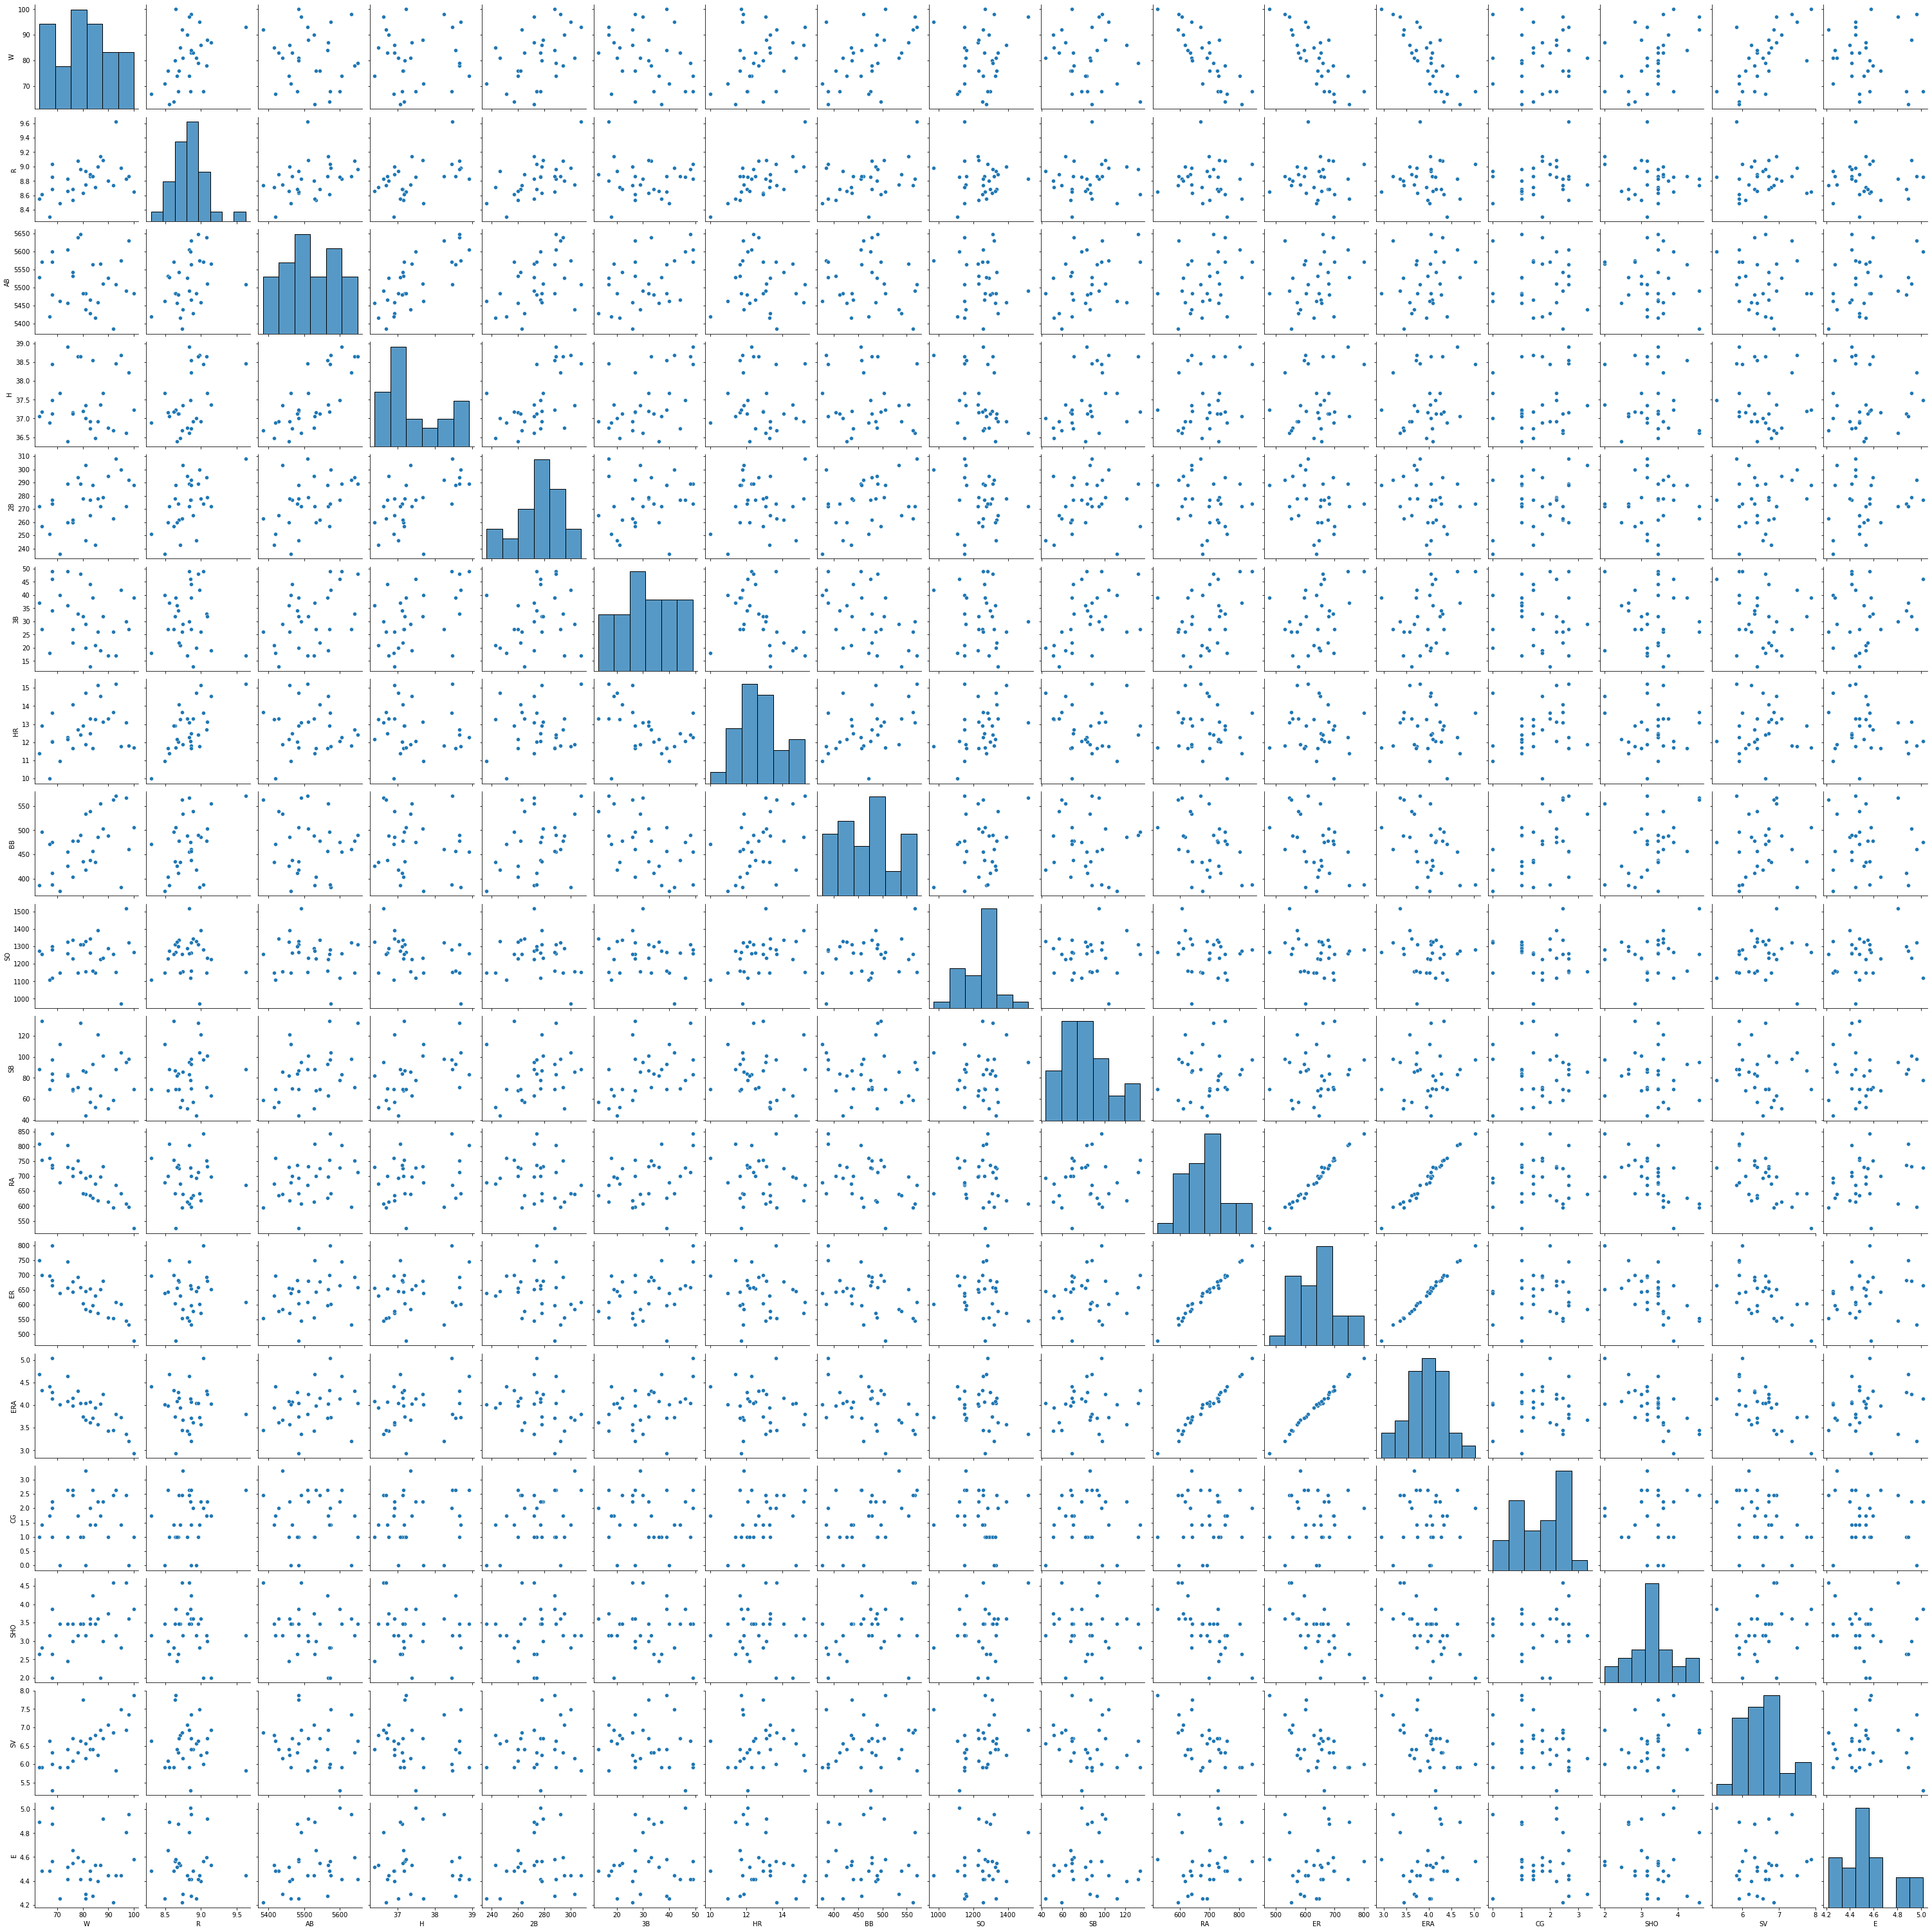

In [33]:
sb.pairplot(ds)

In [29]:
ds.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.439027,-0.087947,0.036473,0.427797,-0.251118,0.313437,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.044033,0.456587,0.668750,-0.089987
R,0.439027,1.000000,0.332282,0.482837,0.564836,-0.053415,0.677247,0.398238,-0.038776,0.081242,-0.048267,-0.046518,-0.055571,0.243076,-0.110952,-0.083105,-0.018100
AB,-0.087947,0.332282,1.000000,0.739633,0.453370,0.435422,-0.050378,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.067194,-0.192916,-0.120051,0.320471
H,0.036473,0.482837,0.739633,1.000000,0.566556,0.477656,-0.089368,-0.118073,-0.399528,0.414587,0.223862,0.252199,0.230901,0.105782,-0.134671,-0.141944,-0.033462
2B,0.427797,0.564836,0.453370,0.566556,1.000000,0.220490,0.067468,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.309868,0.067623,0.157959,0.108391
3B,-0.251118,-0.053415,0.435422,0.477656,0.220490,1.000000,-0.409863,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.047157,-0.054034,-0.164003,0.119112
HR,0.313437,0.677247,-0.050378,-0.089368,0.067468,-0.409863,1.000000,0.425456,0.374731,-0.136842,-0.105426,-0.087349,-0.094183,0.182392,-0.038313,-0.006638,-0.187365
BB,0.484342,0.398238,-0.136414,-0.118073,0.302700,-0.454949,0.425456,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.483682,0.394866,0.105673,-0.075769
SO,0.111850,-0.038776,-0.106022,-0.399528,-0.150752,-0.141196,0.374731,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.101641,0.204442,0.141248,0.161186
SB,-0.157234,0.081242,0.372618,0.414587,0.195027,0.457437,-0.136842,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.029412,-0.100203,-0.191045,0.076161


<AxesSubplot:>

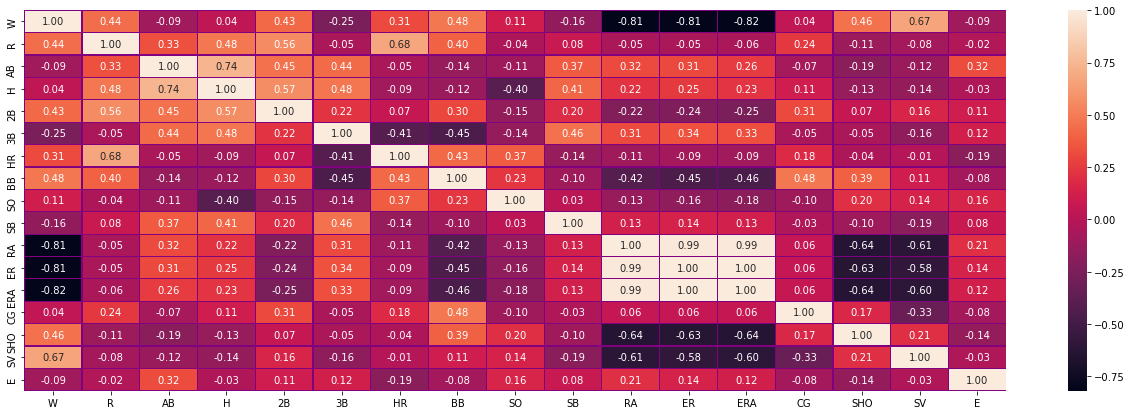

In [30]:
plt.figure(figsize=(22,7))
sb.heatmap(ds.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

AB,H,CG,E has less corr with the target variable

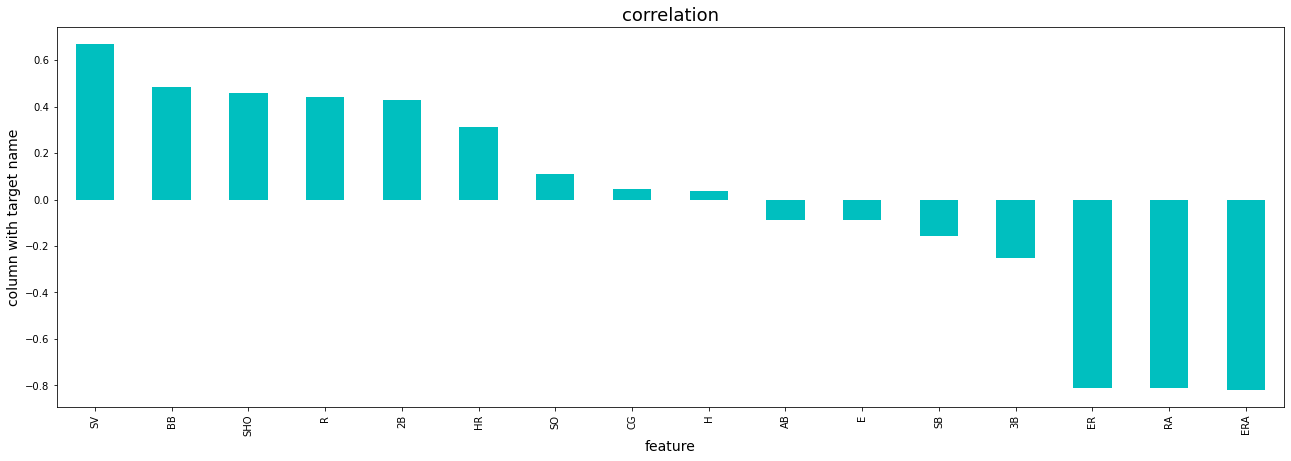

In [32]:
plt.figure(figsize=(22,7))
ds.corr()["W"].sort_values(ascending=False).drop(["W"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

In [35]:
x=ds.drop("W",axis=1)
y=ds["W"]

In [42]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [49]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

In [38]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At the random state {i}, the Training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At the random state {i}, the Testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At the random state 0, the Training accuracy is :- 0.9632556507014587
At the random state 0, the Testing accuracy is :- 0.31784901000431176


At the random state 1, the Training accuracy is :- 0.9666957559704918
At the random state 1, the Testing accuracy is :- 0.6743331814881561


At the random state 2, the Training accuracy is :- 0.987162732849106
At the random state 2, the Testing accuracy is :- -1.721429456622145


At the random state 3, the Training accuracy is :- 0.963893780952397
At the random state 3, the Testing accuracy is :- 0.48923558153350555


At the random state 4, the Training accuracy is :- 0.963878317207009
At the random state 4, the Testing accuracy is :- 0.5752237544335674


At the random state 5, the Training accuracy is :- 0.9474379480957904
At the random state 5, the Testing accuracy is :- 0.858431557189471


At the random state 6, the Training accuracy is :- 0.9542355796717337
At the random state 6, the Testing accuracy is :- 0.7922832553092232


At the random s

At the random state 65, the Training accuracy is :- 0.9544298878207207
At the random state 65, the Testing accuracy is :- 0.7096529011465326


At the random state 66, the Training accuracy is :- 0.9855596263677537
At the random state 66, the Testing accuracy is :- 0.18136504907072715


At the random state 67, the Training accuracy is :- 0.9516244969021215
At the random state 67, the Testing accuracy is :- 0.7827135402310075


At the random state 68, the Training accuracy is :- 0.9449152050478573
At the random state 68, the Testing accuracy is :- 0.7583719812398297


At the random state 69, the Training accuracy is :- 0.9542499195233782
At the random state 69, the Testing accuracy is :- 0.7242811723440461


At the random state 70, the Training accuracy is :- 0.9696716035873274
At the random state 70, the Testing accuracy is :- -1.7612973337793765


At the random state 71, the Training accuracy is :- 0.9674350194807741
At the random state 71, the Testing accuracy is :- -0.226836559267599

In [66]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At the cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At the cross fold2 the cv score is -3.3911636713129703 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the cross fold3 the cv score is -0.0704994274595984 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the cross fold4 the cv score is -0.31079666283673674 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the cross fold5 the cv score is -0.26002520881517865 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the cross fold6 the cv score is 0.21340189817080332 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the cross fold7 the cv score is 0.23298369061968321 and accuracy score for training is 0.9488178326649822 and accuracy for the testing is -0.054326230109291496


At the c

In [52]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))

0.9134989073061918


In [43]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred_test))
print("mean squared error:",mean_squared_error(y_test,pred_test))

print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_test)))

error:
mean absolute error: 2.4640860261002047
mean squared error: 9.543953893883506
root mean squared error: 3.0893290361959678


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
rfr.fit(x_train,y_train)
pred_train=rfr.predict(x_train)
pred_test=rfr.predict(x_test)
print(r2_score(y_test,pred_test))

0.47381072507552835


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
dtr.fit(x_train,y_train)
pred_train=dtr.predict(x_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.2990936555891238


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
knr.fit(x_train,y_train)
pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.35371601208459214


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)
svr.fit(x_train,y_train)
pred_train=svr.predict(x_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

-0.054326230109291496


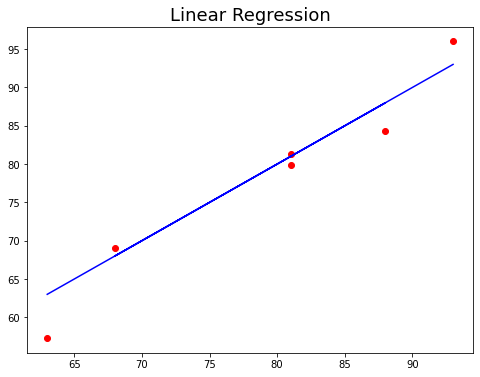

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_lr,color="r")
plt.plot(y_test,y_test,color="b")
plt.title("Linear Regression",fontsize=18)
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [56]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [57]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8631784670547371

In [58]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.332121883432931

In [73]:
cv_score=cross_val_score(lr,x,y,cv=10)
cv_mean=cv_score.mean()
cv_mean

-6.570809130096576

In [62]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [63]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
pred_rid=ls.predict(x_test)
rid=r2_score(y_test,pred_rid)
rid

0.8631784670547371

In [67]:
score=cross_val_score(lr,x,y,cv=2)
print(score)
print(score.mean())

[-2.38676137 -4.39556597]
-3.3911636713129703


In [65]:
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())

[ 0.16466306 -5.12797634  0.18954063  0.24479215  0.68626834]
-0.768542430954771


In [74]:
import pickle
filename="Baseball.pkl"
pickle.dump(lr,open(filename,"wb"))

In [75]:
loaded_model=pickle.load(open('Baseball.pkl',"rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.9134989073061918


In [77]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_lr[:]],index=["predicted","Original"])
Conclusion

,0,1,2,3,4,5
predicted,57.304134,84.322516,81.306036,79.87383,68.984749,95.99421
Original,57.304134,84.322516,81.306036,79.87383,68.984749,95.99421


In [78]:
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,8.979377,5575,38.691084,300,42,11.789826,383,973,104,641,601,3.73,1.414214,2.828427,7.483315,4.447960
1,83,8.862095,5467,36.728735,277,44,12.489996,439,1264,70,700,653,4.07,1.414214,3.464102,6.708204,4.414005
2,81,8.745985,5439,37.349699,303,29,11.874342,533,1157,86,640,584,3.67,3.316625,3.162278,6.164414,4.290840
3,76,8.536178,5533,37.161808,260,27,11.661904,404,1231,68,701,643,3.98,2.645751,3.000000,6.082763,4.657010
4,74,8.832285,5605,38.923001,289,49,12.288206,455,1259,83,803,746,4.64,2.645751,3.464102,5.916080,4.414005
5,93,9.622603,5509,38.470768,308,17,15.231546,570,1151,88,670,609,3.80,2.645751,3.162278,5.830952,4.447960
6,87,9.141787,5567,37.376463,272,19,14.560220,554,1227,63,698,652,4.03,1.732051,2.000000,6.928203,4.530655
7,81,8.933669,5485,37.013511,246,20,14.730920,418,1331,44,693,646,4.05,0.000000,3.162278,6.557439,4.254321
8,80,8.635655,5485,37.188708,278,32,12.922848,436,1310,87,642,604,3.74,1.000000,3.464102,7.745967,4.562903
9,78,9.077520,5640,38.665230,294,33,12.688578,478,1148,71,753,694,4.31,1.732051,3.162278,6.324555,4.594701


In [79]:
Future_pred=[[9.032802,5385,36.755952,251,34,11.401754,457,1290,59,627,659,4.09,1.000000,3.464102,6.403124,4.414005]]

pred= lr.predict(Future_pred)
print(pred)

[81.02094601]
